In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('December-2019.csv')

In [3]:
df.head()

,ds,KE
0,12/1/2019 0:00,207
1,12/1/2019 0:01,206
2,12/1/2019 0:02,205
3,12/1/2019 0:03,205
4,12/1/2019 0:04,205


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44640 entries, 0 to 44639
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      44640 non-null  object
 1   KE      44640 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 697.6+ KB


In [6]:
df1 = pd.read_csv('KE2019.csv')

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525604 entries, 0 to 525603
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   ds      525604 non-null  object
 1   KE      525604 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 8.0+ MB


In [10]:
df['KE'].head(30)

0     207
1     206
2     205
3     205
4     205
5     204
6     204
7     204
8     204
9     203
10    203
11    203
12    202
13    202
14    202
15    202
16    201
17    201
18    201
19    200
20    200
21    200
22    200
23    200
24    200
25    200
26    200
27    200
28    200
29    200
Name: KE, dtype: int64

In [45]:
S_sys = 12013.812843
t=1
H = []
for values in df['KE']:
    H_system = values*1000/S_sys
    #df['New_KE'] = H_system
    H.append(H_system)
    t+=1
    #print(df['New_KE'])

In [46]:
import matplotlib.pyplot as plt

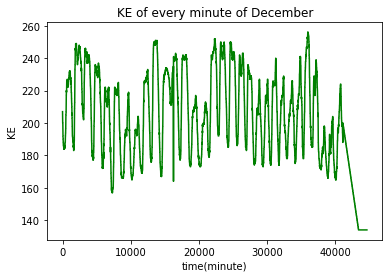

In [65]:
plt.figure()
x = list(range(1, 44641))
plt.plot(x,df['KE'],'g-')
plt.title('KE of every minute of December')
plt.xlabel('time(minute)')
plt.ylabel('KE')
plt.savefig('KE.jpeg', dpi=300)
plt.show()

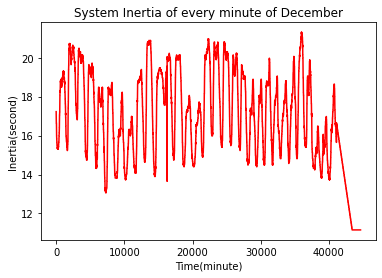

In [69]:
plt.figure()
x = list(range(1, 44641))
plt.plot(x,H,'r-')
plt.title('System Inertia of every minute of December')
plt.xlabel('Time(minute)')
plt.ylabel('Inertia(second)')
plt.savefig('Inertia.jpeg', dpi=300)
plt.show()

In [71]:
df

,ds,KE,New_KE
0,12/1/2019 0:00,207,11.153828
1,12/1/2019 0:01,206,11.153828
2,12/1/2019 0:02,205,11.153828
3,12/1/2019 0:03,205,11.153828
4,12/1/2019 0:04,205,11.153828
...,...,...,...
44635,12/31/2019 23:55,134,11.153828
44636,12/31/2019 23:56,134,11.153828
44637,12/31/2019 23:57,134,11.153828
44638,12/31/2019 23:58,134,11.153828


ValueError: Error parsing datetime string "12/1/2019 0:00" at position 2

Locator attempting to generate 1613 ticks ([-2223.0, ..., 46842.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1613 ticks ([-2223.0, ..., 46842.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1613 ticks ([-2223.0, ..., 46842.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1613 ticks ([-2223.0, ..., 46842.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1613 ticks ([-2223.0, ..., 46842.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1613 ticks ([-2223.0, ..., 46842.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1613 ticks ([-2223.0, ..., 46842.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1613 ticks ([-2223.0, ..., 46842.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to generate 1613 ticks ([-2223.0, ..., 46842.0]), which exceeds Locator.MAXTICKS (1000).
Locator attempting to genera

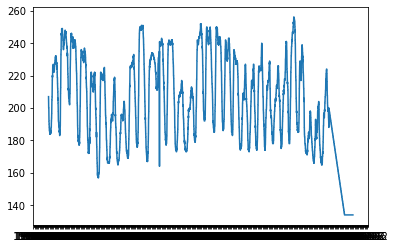

In [74]:
#date tick labels

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

# Load a numpy structured array from yahoo csv data with fields date, open,
# close, volume, adj_close from the mpl-data/example directory.  This array
# stores the date as an np.datetime64 with a day unit ('D') in the 'date'
# column.
data = df
fig, ax = plt.subplots()
ax.plot('ds', 'KE', data=data)

# Major ticks every 6 months.
fmt_half_year = mdates.MonthLocator(interval=6)
ax.xaxis.set_major_locator(fmt_half_year)

# Minor ticks every month.
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)

# Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Round to nearest years.
datemin = np.datetime64(data['ds'][0], 'Y')
datemax = np.datetime64(data['ds'][-1], 'Y') + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax)

# Format the coords message box, i.e. the numbers displayed as the cursor moves
# across the axes within the interactive GUI.
ax.format_xdata = mdates.DateFormatter('%Y-%m')
ax.format_ydata = lambda x: f'${x:.2f}'  # Format the price.
ax.grid(True)

# Rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them.
fig.autofmt_xdate()
plt.savefig('formated_plot.jpeg', dpi=400)
plt.show()